In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

conn = sqlite3.connect('seattle_airbnb.db')

In [16]:
street_map = gpd.read_file('C:/Users/Nicholas/Downloads/Seattle_Streets/Seattle_Streets.shp')

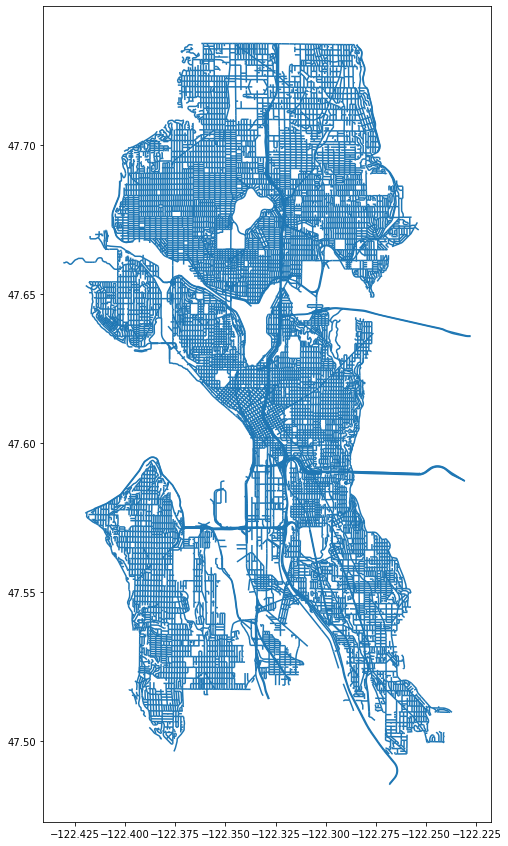

In [18]:
fig,ax =plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [28]:
df = pd.read_csv('listings.csv')
crs='EPSG:4326'

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61094,-122.29286,Entire home/apt,475,30,32,2020-02-01,0.58,2,238
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,102,2,153,2021-07-12,2.45,1,87
2,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,75,2,149,2021-06-28,1.12,9,275
3,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,165,5,45,2021-05-31,0.52,2,276
4,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,125,5,58,2021-04-25,0.58,2,311


In [23]:
geometry = [Point(xy) for xy in zip( df['longitude'], df['latitude'])]
geometry[:3]

In [29]:
geo_df = gpd.GeoDataFrame(df, #specify data 
                          crs = crs, #specify coordinate reference system
                          geometry = geometry) #specify geometry list created
geo_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61094,-122.29286,Entire home/apt,475,30,32,2020-02-01,0.58,2,238,POINT (-122.29286 47.61094)
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,102,2,153,2021-07-12,2.45,1,87,POINT (-122.33629 47.65444)
2,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,75,2,149,2021-06-28,1.12,9,275,POINT (-122.31937 47.55017)
3,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,165,5,45,2021-05-31,0.52,2,276,POINT (-122.38663 47.55495)
4,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,125,5,58,2021-04-25,0.58,2,311,POINT (-122.38607 47.55627)


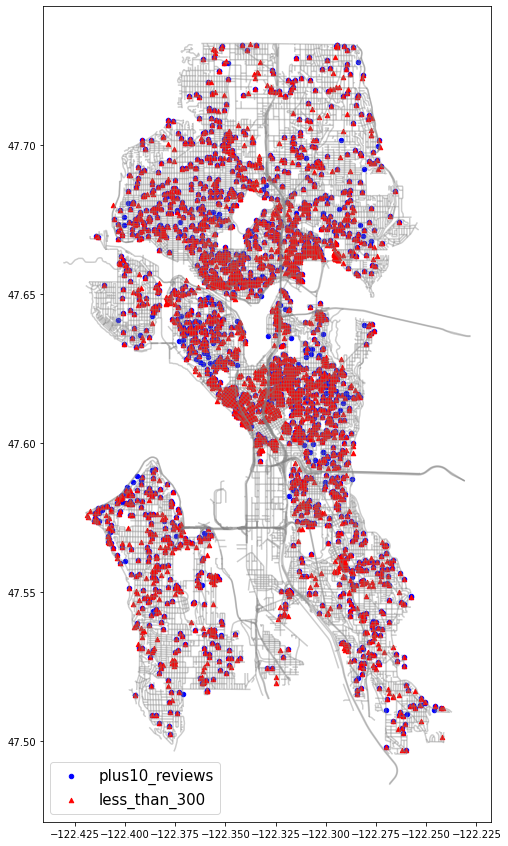

In [33]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color="grey")
geo_df[geo_df['number_of_reviews'] > 10].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "plus10_reviews")
geo_df[geo_df['price'] < 300].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "less_than_300")
plt.legend(prop={'size': 15})

In [10]:
# Find the 

query = """
SELECT id,
    name,
    host_name
FROM listings  
WHERE neighbourhood_group = 'Ballard'

"""

df = pd.read_sql(query, conn)
df.head(20)

,id,name,host_name
0,25002,"Beautiful, Private Spot in Quiet Ballard",Amanda
1,30712,Cozy Ballard Apartment,Al
2,218741,"Private, Large Room+Bath in Ballard",Corinne & Tom
3,260613,Charming Hideaway in North Ballard,Dot & Lucy
4,461234,Browns House Guest Apt. in Ballard,Diana
5,699460,Ballard Artist's Studio,Patti And Benson
6,904057,Seattle Mini Home with Hot Tub and Private Deck,Errin
7,1023693,"Get Cozy at a Hip, Vintage-Style Retreat",Shannon
8,1175308,Ballard oasis in the pacific Northwest,Jenny
9,1301535,2 Huge Private Rooms + Common Area,Corinne & Tom
